<div>
<img src="https://scontent.fblr8-1.fna.fbcdn.net/v/t1.6435-9/76903806_2618951018128214_1634804792129748992_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=e3f864&_nc_ohc=zDUwWPpAYHgAX9Be10Q&_nc_ht=scontent.fblr8-1.fna&oh=00_AfCimqinGG5TCkSlOI6J8wBoxB0XiwObyHDSanjwfn05yQ&oe=64B24665" width="400" height="200" align="centre"/>
</div>

# Problem Statement
> This data science project aims to build a predictive model that accurately estimates the sales of each product at specific stores for BigMart.

 By developing this model, BigMart aims to identify the key attributes of products and stores that significantly influence sales and gain insights into strategies for increasing sales.

## Hypothesis Generation


- Hypothesis 1: The size of the store(Outlet_Size) impacts sales.
      We hypothesize that larger stores will have higher sales due to their increased product variety and customer footfall.
- Hypothesis 2: The location of the store (Outlet_Location_Type) influences sales.
      We predict that stores located in densely populated areas or urban regions will have higher sales volumes compared to stores in rural areas.
- Hypothesis 3: The type of outlet (Outlet_Type) has a significant influence on sales.
      We expect that certain outlet types, such as supermarkets, will generate higher sales compared to other types of outlets.
- Hypothesis 4: The visibility of an item on the shelves(Item_Visibility) has a positive impact on its sales.
      Items with higher visibility are more likely to experience higher sales volumes.

# Loading packages and data

In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

sns.set_style('whitegrid')

In [299]:
# Importing the train data
df = pd.read_csv('https://raw.githubusercontent.com/akhilraj7000/Datasets_/main/BigMart_Train.csv')

# Importing the test data
df_test = pd.read_csv('https://raw.githubusercontent.com/akhilraj7000/Datasets_/main/BigMart_Test.csv')

In [300]:
# Combining both the test and the train datasets
combined_df = pd.concat([df, df_test], axis=0)

# Resetting the index
combined_df = combined_df.reset_index(drop=True)

# Data structure and content

In [301]:
combined_df.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
12711,NCP55,14.65,Low Fat,0.01119,Others,56.5614,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
7786,FDE44,14.65,Low Fat,0.00000,Fruits and Vegetables,49.7692,OUT045,2002,NaN,Tier 2,Supermarket Type1,837.5764


In [302]:
combined_df.shape

(14204, 12)

In [303]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


# Exploratory Data Analysis

In [304]:
# Numerical Cols.
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [305]:
# Categorical Cols.
combined_df.describe(include=['O']).T

,count,unique,top,freq
Item_Identifier,14204,1559,FDU15,10
Item_Fat_Content,14204,5,Low Fat,8485
Item_Type,14204,16,Fruits and Vegetables,2013
Outlet_Identifier,14204,10,OUT027,1559
Outlet_Size,10188,3,Medium,4655
Outlet_Location_Type,14204,3,Tier 3,5583
Outlet_Type,14204,4,Supermarket Type1,9294


In [306]:
combined_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# Missing Value Treatment
Given that there are missing/null values in the dataset, it is essential to address them before proceeding with further analysis.

### Item_Weight



In [307]:
# Showing the list of items which have null values in their 'Item_Weight' column.
combined_df[combined_df['Item_Weight'].isnull()]['Item_Identifier'].value_counts()

FDP10    2
FDP27    2
FDJ33    2
FDK16    2
FDR52    2
        ..
FDX59    1
NCL29    1
FDS35    1
FDU34    1
FDN31    1
Name: Item_Identifier, Length: 1559, dtype: int64

- The 'Item_Weight' column is null for a total of 1559 unique items.
- Let's determine whether these items belong to a single outlet or if they are distributed across different outlets.

In [308]:
# Showing the list of Outlets affected by these null values.
combined_df[combined_df['Item_Weight'].isnull()]['Outlet_Identifier'].value_counts()

OUT027    1559
OUT019     880
Name: Outlet_Identifier, dtype: int64

- Among the 10 outlets, only 2 outlets contain the 1559 unique items with null weights.
- Let's verify if these items are present in other outlets along with their corresponding item weights.

In [309]:
# Lets look for the item 'FDA08'
combined_df.loc[combined_df['Item_Identifier'] == 'FDA08'][['Outlet_Identifier', 'Item_Weight']]

,Outlet_Identifier,Item_Weight
192,OUT045,11.85
3355,OUT046,11.85
3619,OUT017,11.85
7220,OUT027,NaN
7707,OUT019,NaN
7876,OUT013,11.85
9170,OUT049,11.85
11418,OUT018,11.85
13443,OUT035,11.85


- Confirming our suspicion, item 'FDA08' is indeed present in multiple outlets, each with its respective item weight.
- To address the issue of 'Null' item weights, we will replace them with the item weight from a different outlet that corresponds to the same item.

In [310]:
# Grouping by 'Item_Identifier' to get the mean of 'Item_Weight' for each item.
new_df = combined_df.groupby(by='Item_Identifier')['Item_Weight'].mean()
new_df

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [311]:
# Now we will merge the new_df DataFrame with our original DataFrame df
trans_df = pd.merge(combined_df,new_df,on='Item_Identifier', how='left')
trans_df.sample(2)

,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
296,FDK36,7.090,Low Fat,0.007214,Baking Goods,47.9034,OUT035,2004,Small,Tier 2,Supermarket Type1,583.2408,7.090
3464,FDA58,9.395,Low Fat,0.103665,Snack Foods,233.6932,OUT013,1987,High,Tier 3,Supermarket Type1,1414.1592,9.395


- Here our old column name 'Item_Weight' got replaced to 'Item_Weight_x' as during the merging process, two DataFrames(df & new_df ) were having the same column name.

In [312]:
# We will replace the new weight column 'Item_Weight_y' with the old one 'Item_Weight_x'
trans_df['Item_Weight_x'] = trans_df['Item_Weight_y']

# Now we drop the extra column 'Item_Weight_y' as there is no use of it
combined_df = trans_df.drop(columns=['Item_Weight_y'], axis=1)

# And for clarity we will rename the column 'Item_Weight_x' to 'Item_Weight'
combined_df.rename(columns = {'Item_Weight_x': 'Item_Weight'}, inplace=True)
combined_df.shape

(14204, 12)

In [313]:
combined_df['Item_Weight'].isnull().sum()

0

### Outlet_Size


In [314]:
combined_df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [315]:
combined_df[combined_df['Outlet_Size'].isnull()]['Outlet_Identifier'].value_counts()

OUT045    1548
OUT017    1543
OUT010     925
Name: Outlet_Identifier, dtype: int64

- So three outlets are affected by outliers in the 'Outlet_Size' column
- Now lets check the type of outlet(s) they belong to

In [316]:
combined_df[combined_df['Outlet_Size'].isnull()][['Outlet_Identifier', 'Outlet_Type']].value_counts()

Outlet_Identifier  Outlet_Type      
OUT045             Supermarket Type1    1548
OUT017             Supermarket Type1    1543
OUT010             Grocery Store         925
dtype: int64

- So those three outlets belong to 'Supermarket Type1' and 'Grocery Store' type
- Now lets analyze the Outlet_Size of these Outlet_Types

In [317]:
# Observation 1
combined_df[combined_df['Outlet_Type'] == 'Supermarket Type1']['Outlet_Size'].value_counts()

Small     3100
High      1553
Medium    1550
Name: Outlet_Size, dtype: int64

In [318]:
# Observation 2
combined_df[combined_df['Outlet_Type'] == 'Grocery Store']['Outlet_Size'].value_counts()

Small    880
Name: Outlet_Size, dtype: int64

- From both of the above observations we can see that those three outlets belong to same 'Outlet_Size' i.e. 'Small'

In [319]:
combined_df['Outlet_Size'].fillna('Small', inplace=True)
combined_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# Univariate Analysis

### Item_Identifier

In [320]:
combined_df['Item_Identifier'].nunique()

1559

In [321]:
item_df = combined_df['Item_Identifier'].value_counts().rename_axis('items').reset_index(name='store_count')
item_df.groupby(by='store_count').count()

,items
store_count,
7,13
8,305
9,737
10,504


Observations:
- BigMart has got 504 items that are present in all its 10 stores.
- BigMart has got 737 items that are present in 9 of its store.
- BigMart has got 305 items that are  present in 8 of its stores.
- BigMart has got 13 items that are present in 7 of its stores.

### Item_Weight

In [322]:
combined_df['Item_Weight'].nunique()

423

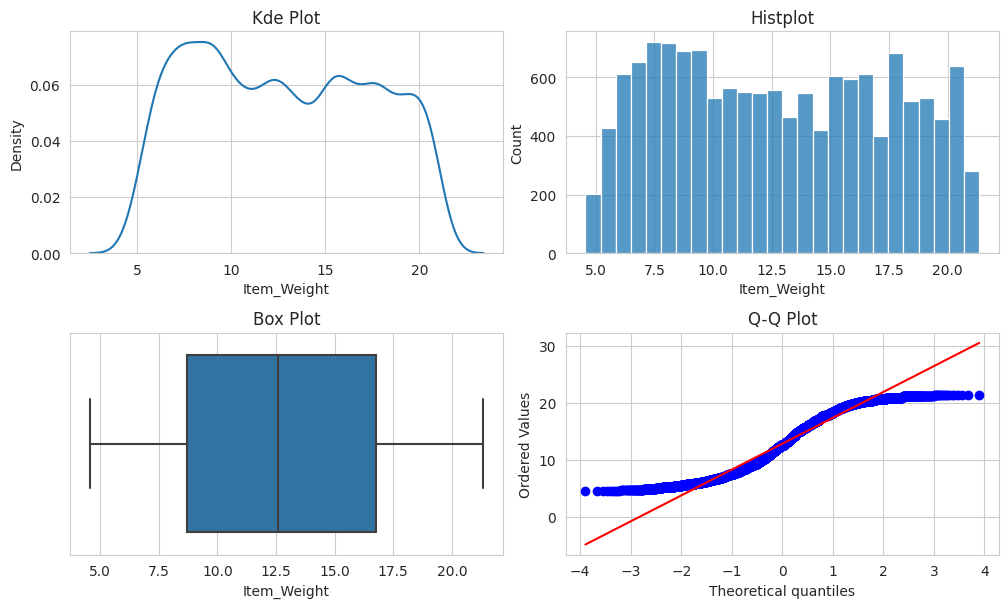

In [323]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), )
sns.kdeplot(combined_df['Item_Weight'], ax=axes[0, 0])
axes[0, 0].set_title('Kde Plot')

sns.histplot(combined_df['Item_Weight'], ax=axes[0, 1])
axes[0, 1].set_title('Histplot')

sns.boxplot(x=combined_df['Item_Weight'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot')

sp.stats.probplot(combined_df['Item_Weight'], plot=axes[1, 1], fit=True)
axes[1, 1].set_title('Q-Q Plot')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

Observations:
- From the kde plot and the histogram we can observe that the shape of the distribution is not normal
- In Box plot we can observe that there is no presence of outliers and also the distribution is very lightly skewed to the right(negligible)
- In QQ plot, deviations from a straight line indicate departures from normality.

### Item_Fat_Content

In [324]:
combined_df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

- 'low fat' and 'LF' belongs to the same 'Low Fat' category
- 'reg' belongs to 'Regular' category

> We will replace 'low fat' and 'LF' with 'Low Fat' and 'reg' with 'Regular'

In [325]:
combined_df['Item_Fat_Content'] = combined_df['Item_Fat_Content'].replace({'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'})
combined_df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

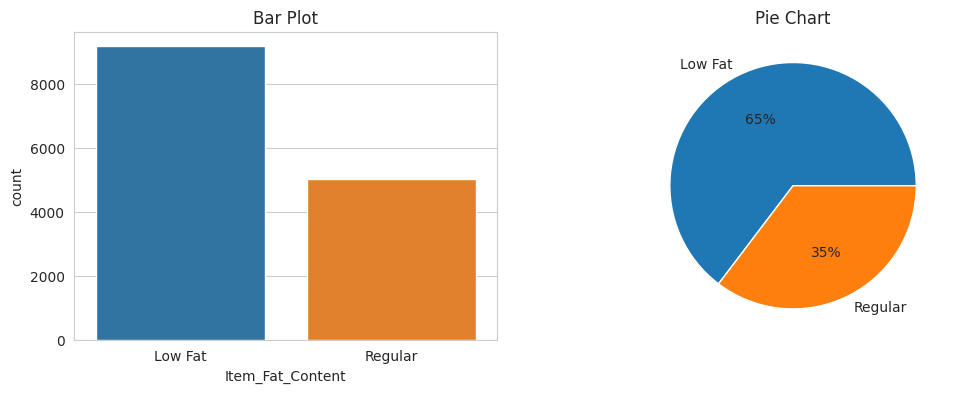

In [326]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), )
sns.countplot(x=combined_df['Item_Fat_Content'], ax=axes[0])
axes[0].set_title('Bar Plot')

plt.pie(x=combined_df['Item_Fat_Content'].value_counts(), labels=combined_df['Item_Fat_Content'].value_counts().index, autopct='%.0f%%')
axes[1].set_title('Pie Chart')

plt.show()

Observations:
- The majority of items in BigMart, around 65%, fall under the category of "Low Fat."
- The remaining 35% of items are classified as "Regular."

### Item_Visibility

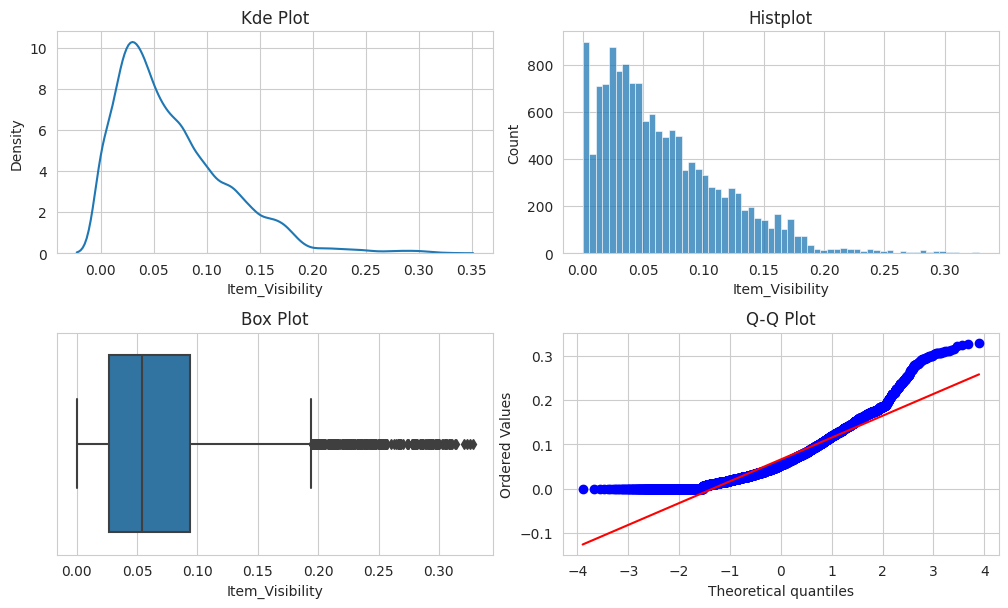

In [327]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), )
sns.kdeplot(combined_df['Item_Visibility'], ax=axes[0, 0])
axes[0, 0].set_title('Kde Plot')

sns.histplot(combined_df['Item_Visibility'], ax=axes[0, 1])
axes[0, 1].set_title('Histplot')

sns.boxplot(x=combined_df['Item_Visibility'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot')

sp.stats.probplot(combined_df['Item_Visibility'], plot=axes[1, 1], fit=True)
axes[1, 1].set_title('Q-Q Plot')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

Observations:
- From the kde plot and the histogram we can observe that it is a right skewed data
- In Box plot we can observe that there are outliers present in the data
- In QQ plot, deviations from a straight line indicate departures from normality and right skewed data

Based on these observations, it can be inferred that there are many items in BigMart that have low visibility.

### Item_Type

In [328]:
combined_df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

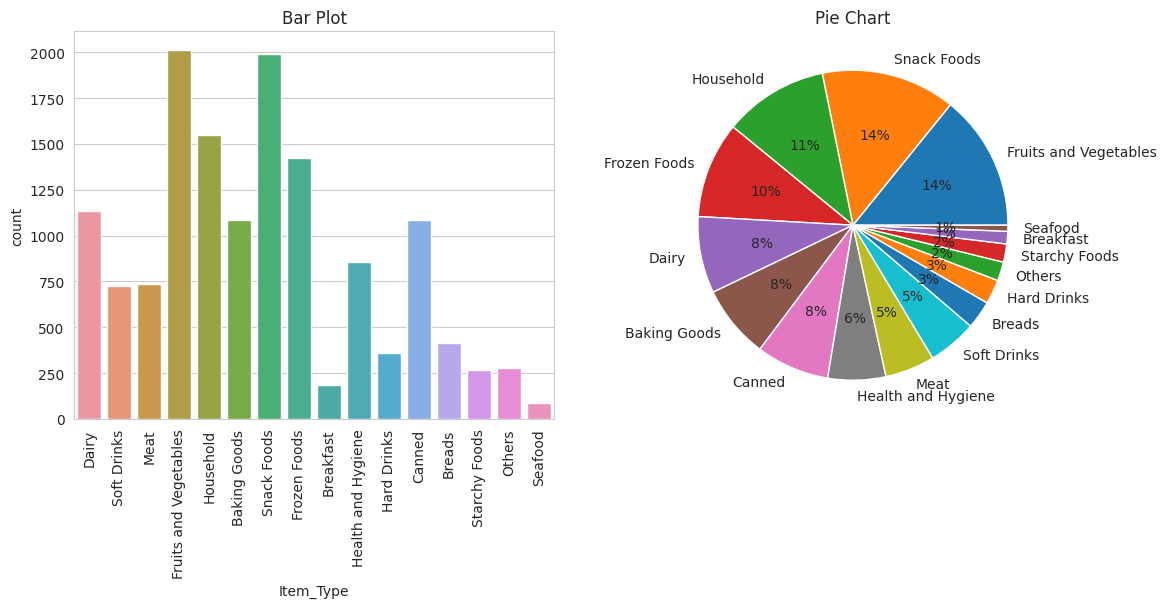

In [329]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), )
sns.countplot(x=combined_df['Item_Type'], ax=axes[0])
axes[0].set_title('Bar Plot')
axes[0].set_xticklabels(labels=combined_df['Item_Type'].unique(), rotation=90)

plt.pie(x=combined_df['Item_Type'].value_counts(), labels=combined_df['Item_Type'].value_counts().index, autopct='%.0f%%')
axes[1].set_title('Pie Chart')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

### Item_MRP

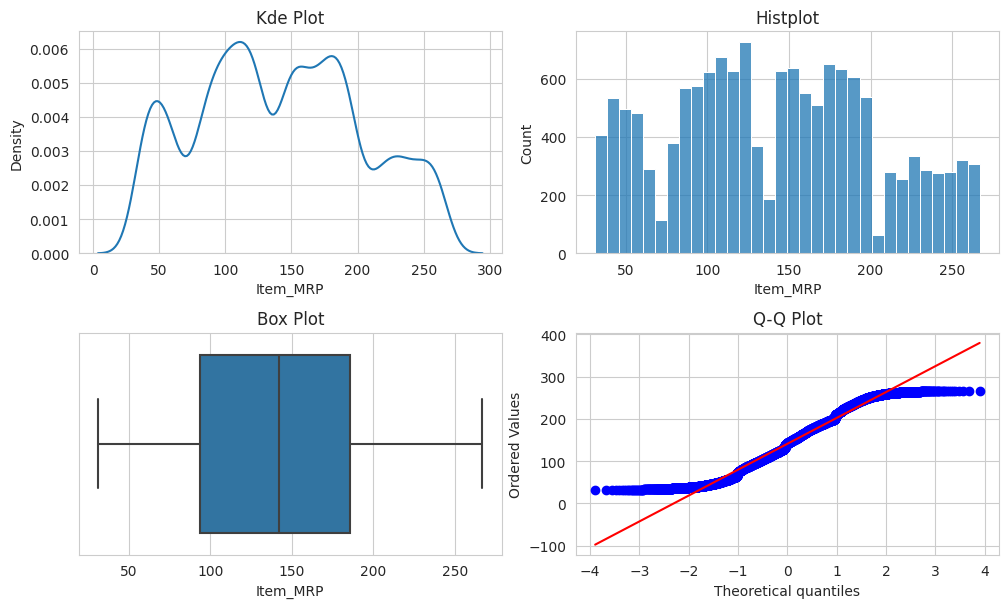

In [330]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), )
sns.kdeplot(combined_df['Item_MRP'], ax=axes[0, 0])
axes[0, 0].set_title('Kde Plot')

sns.histplot(combined_df['Item_MRP'], ax=axes[0, 1])
axes[0, 1].set_title('Histplot')

sns.boxplot(x=combined_df['Item_MRP'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot')

sp.stats.probplot(combined_df['Item_MRP'], plot=axes[1, 1], fit=True)
axes[1, 1].set_title('Q-Q Plot')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

Observations:
- From the kde plot and the histogram we can observe that the 'Item_MRP' data doesn't follow normal distribution.
- In Box plot we can observe that there are no outliers present in the data
- Q-Q plot shows that the data 'Item_MRP' is an under-dispersed data.

### Outlet_Identifier

In [331]:
combined_df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [332]:
combined_df['Outlet_Identifier'].nunique()

10

### Outlet_Establishment_Year

In [333]:
combined_df['Outlet_Establishment_Year'].nunique()

9

In [334]:
combined_df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

### Outlet_Size

In [335]:
combined_df['Outlet_Size'].value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

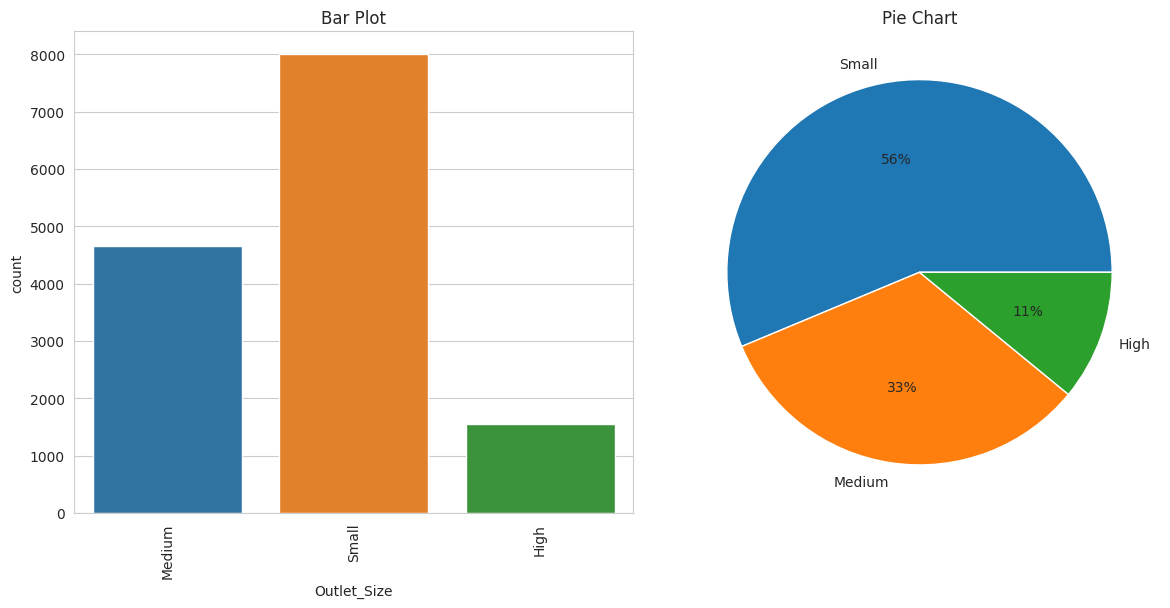

In [336]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), )
sns.countplot(x=combined_df['Outlet_Size'], ax=axes[0])
axes[0].set_title('Bar Plot')
axes[0].set_xticklabels(labels=combined_df['Outlet_Size'].unique(), rotation=90)

plt.pie(x=combined_df['Outlet_Size'].value_counts(), labels=combined_df['Outlet_Size'].value_counts().index, autopct='%.0f%%')
axes[1].set_title('Pie Chart')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

### Outlet_Location_Type

In [337]:
combined_df['Outlet_Location_Type'].nunique()

3

In [338]:
combined_df['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

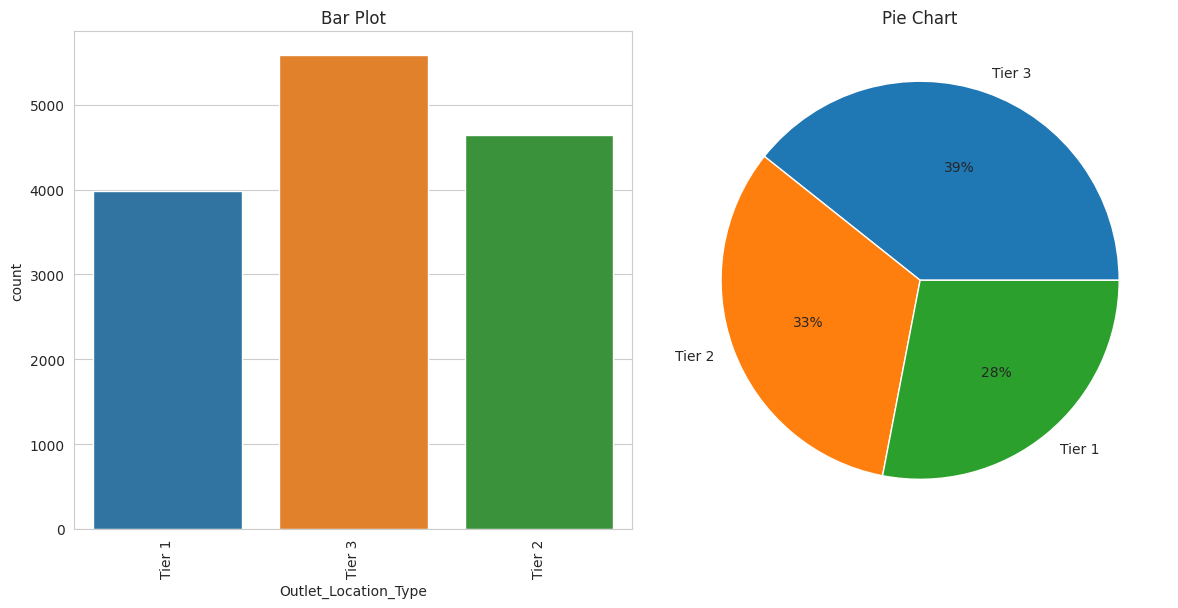

In [339]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), )
sns.countplot(x=combined_df['Outlet_Location_Type'], ax=axes[0])
axes[0].set_title('Bar Plot')
axes[0].set_xticklabels(labels=combined_df['Outlet_Location_Type'].unique(), rotation=90)

plt.pie(x=combined_df['Outlet_Location_Type'].value_counts(), labels=combined_df['Outlet_Location_Type'].value_counts().index, autopct='%.0f%%')
axes[1].set_title('Pie Chart')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

### Outlet_Type

In [340]:
combined_df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

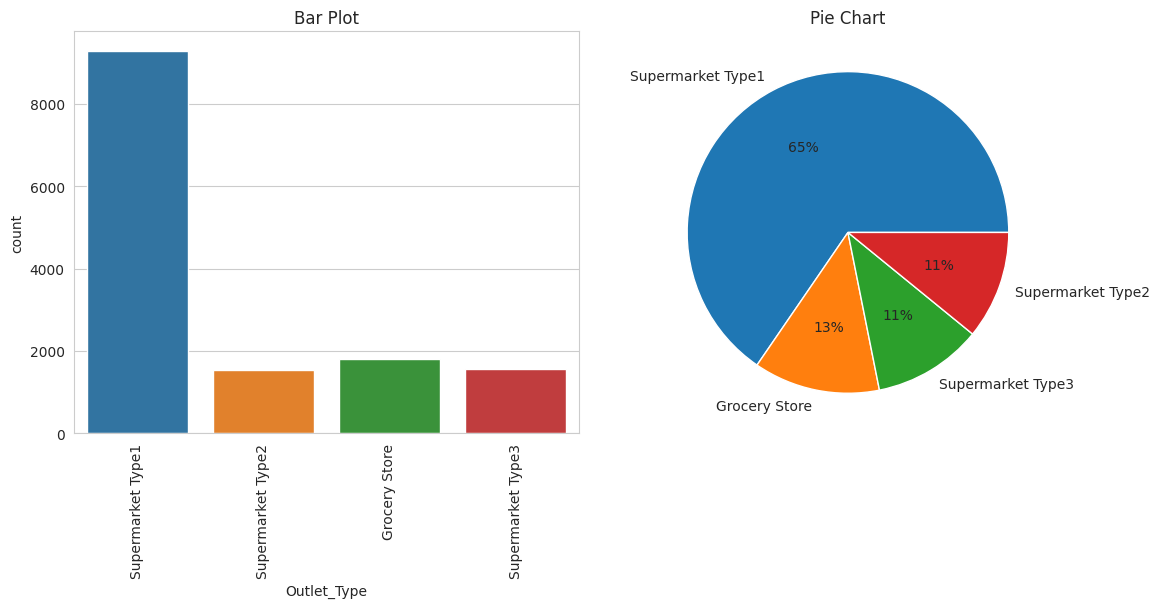

In [341]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), )
sns.countplot(x=combined_df['Outlet_Type'], ax=axes[0])
axes[0].set_title('Bar Plot')
axes[0].set_xticklabels(labels=combined_df['Outlet_Type'].unique(), rotation=90)

plt.pie(x=combined_df['Outlet_Type'].value_counts(), labels=combined_df['Outlet_Type'].value_counts().index, autopct='%.0f%%')
axes[1].set_title('Pie Chart')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

### Item_Outlet_Sales

In [342]:
combined_df['Item_Outlet_Sales'].nunique()

3493

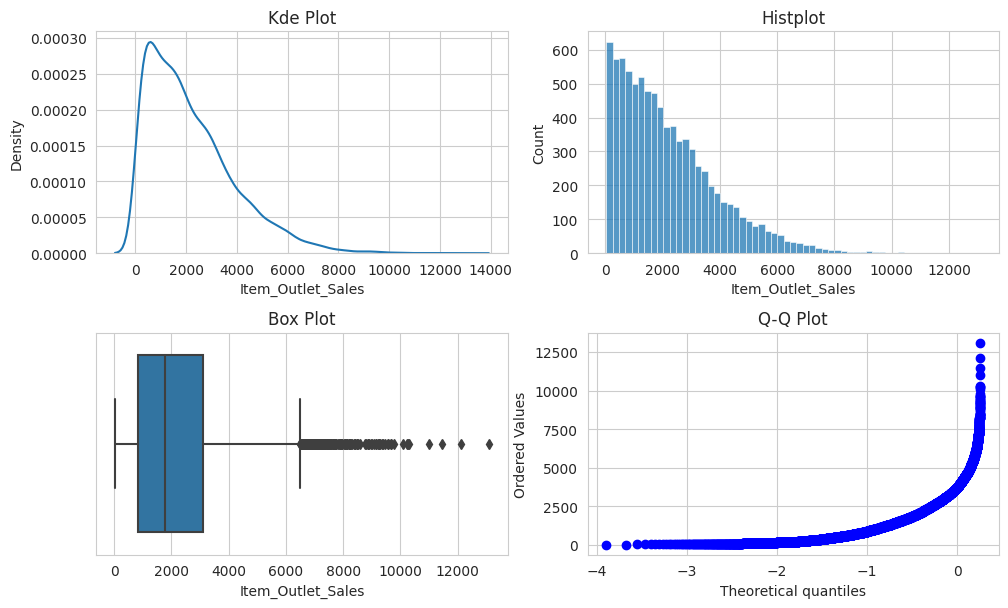

In [343]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), )
sns.kdeplot(combined_df['Item_Outlet_Sales'], ax=axes[0, 0])
axes[0, 0].set_title('Kde Plot')

sns.histplot(combined_df['Item_Outlet_Sales'], ax=axes[0, 1])
axes[0, 1].set_title('Histplot')

sns.boxplot(x=combined_df['Item_Outlet_Sales'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot')

sp.stats.probplot(combined_df['Item_Outlet_Sales'], plot=axes[1, 1], fit=True)
axes[1, 1].set_title('Q-Q Plot')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

# Bivariate Analysis

## Categorical - Categorical Columns

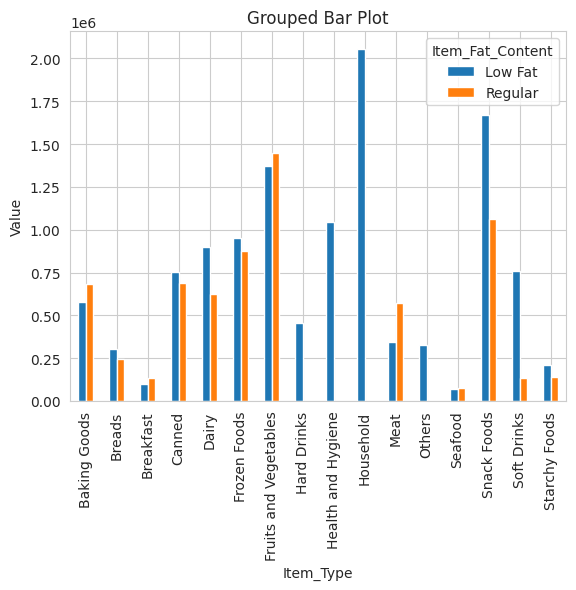

In [344]:
# Grouped bar plot
combined_df.groupby(['Item_Type', 'Item_Fat_Content'])['Item_Outlet_Sales'].sum().unstack().plot.bar()

# Add labels and title
plt.xlabel('Item_Type')
plt.ylabel('Value')
plt.title('Grouped Bar Plot')

# Show the plot
plt.show()

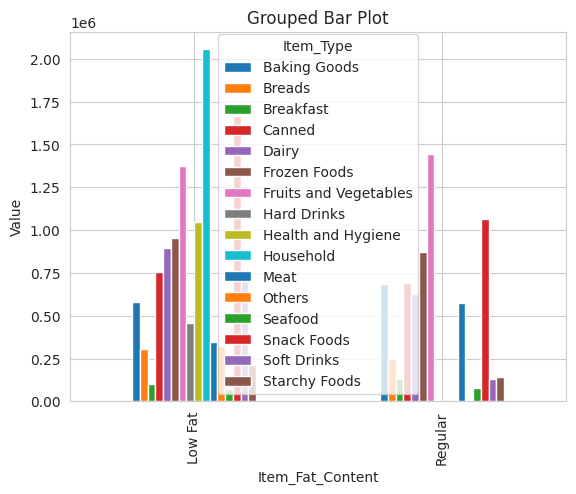

In [345]:
# Grouped bar plot
combined_df.groupby(['Item_Fat_Content', 'Item_Type'])['Item_Outlet_Sales'].sum().unstack().plot.bar()

# Add labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Value')
plt.title('Grouped Bar Plot')

# Show the plot
plt.show()

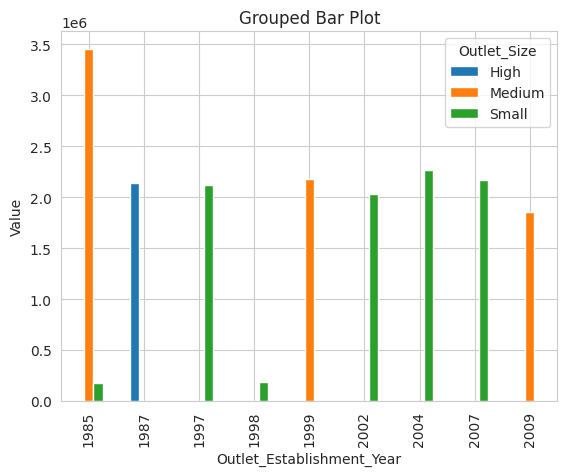

In [346]:
# Grouped bar plot
combined_df.groupby(['Outlet_Establishment_Year', 'Outlet_Size'])['Item_Outlet_Sales'].sum().unstack().plot.bar()

# Add labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Value')
plt.title('Grouped Bar Plot')

# Show the plot
plt.show()

## Numerical-Categorical Features

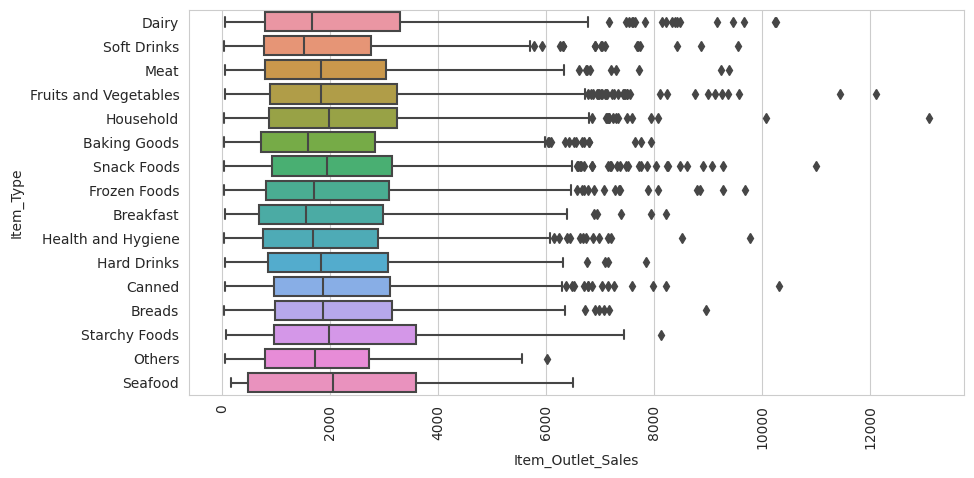

In [347]:
# Boxplot between 'Item_Type' and 'Item_Outlet_Sales'
plt.figure(figsize=(10, 5))
sns.boxplot(x=combined_df['Item_Outlet_Sales'], y=combined_df['Item_Type'])
plt.xticks(rotation=90)
plt.show()

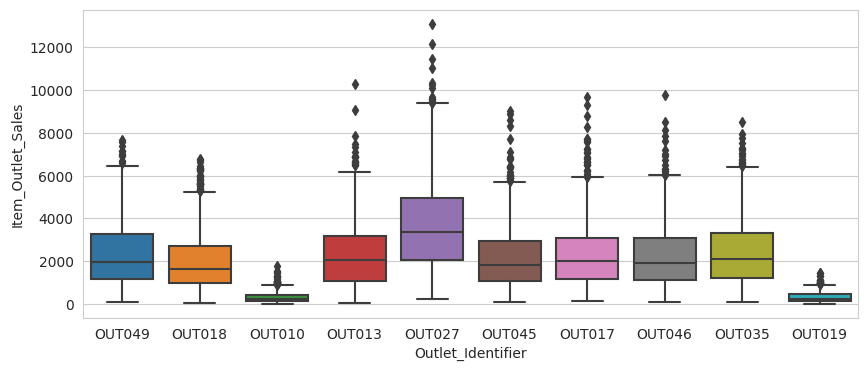

In [348]:
# Boxplot between 'Outlet_Identifier' and 'Item_Outlet_Sales'
plt.figure(figsize=(10, 4))
sns.boxplot(y = combined_df['Item_Outlet_Sales'], x=combined_df['Outlet_Identifier'])
plt.show()

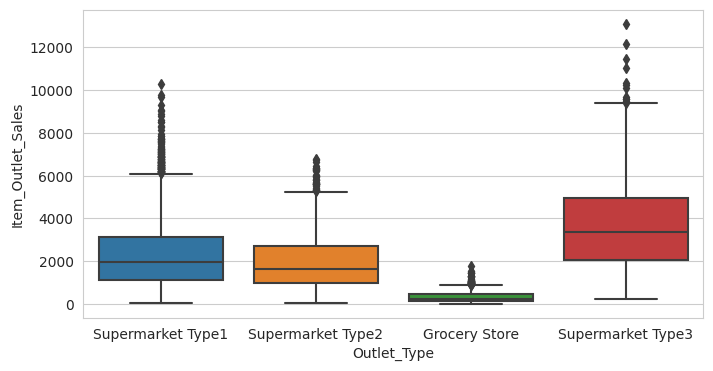

In [349]:
# Boxplot between 'Outlet_Type' and 'Item_Outlet_Sales'
plt.figure(figsize=(8, 4))
sns.boxplot(y = combined_df['Item_Outlet_Sales'], x=combined_df['Outlet_Type'])
plt.show()

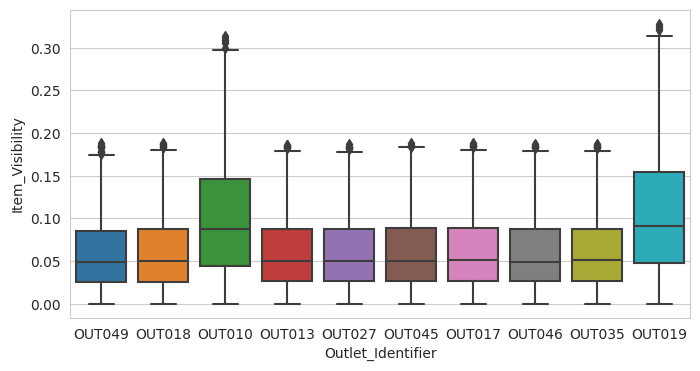

In [350]:
# Boxplot between 'Item_Visibility' and 'Outlet_Identifier'
plt.figure(figsize=(8, 4))
sns.boxplot(y = combined_df['Item_Visibility'], x=combined_df['Outlet_Identifier'])
plt.show()

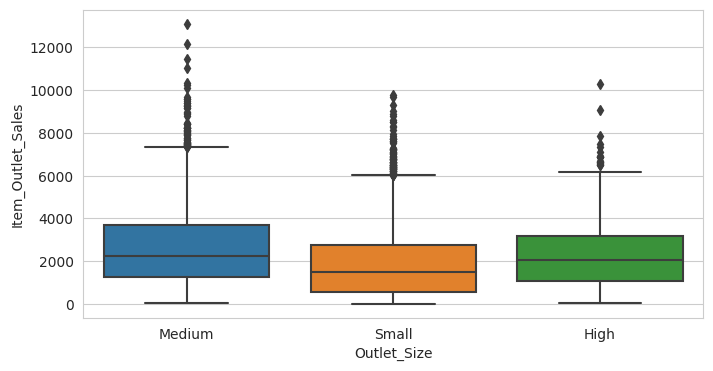

In [351]:
# Boxplot between 'Item_Outlet_Sales' and 'Outlet_Size'
plt.figure(figsize=(8, 4))
sns.boxplot(y = combined_df['Item_Outlet_Sales'], x=combined_df['Outlet_Size'])
plt.show()

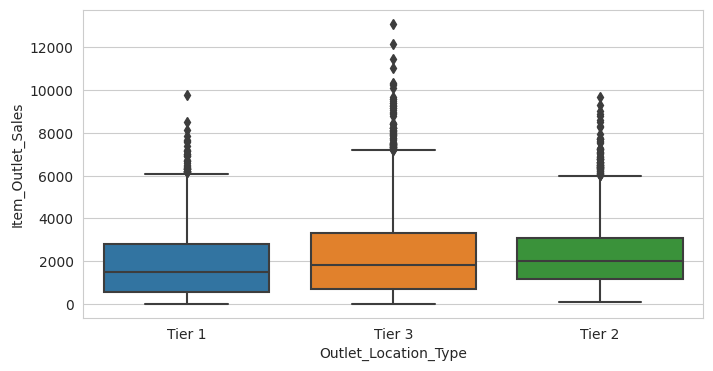

In [352]:
# Boxplot between 'Item_Outlet_Sales' and 'Outlet_Location_Type'
plt.figure(figsize=(8, 4))
sns.boxplot(y = combined_df['Item_Outlet_Sales'], x=combined_df['Outlet_Location_Type'])
plt.show()

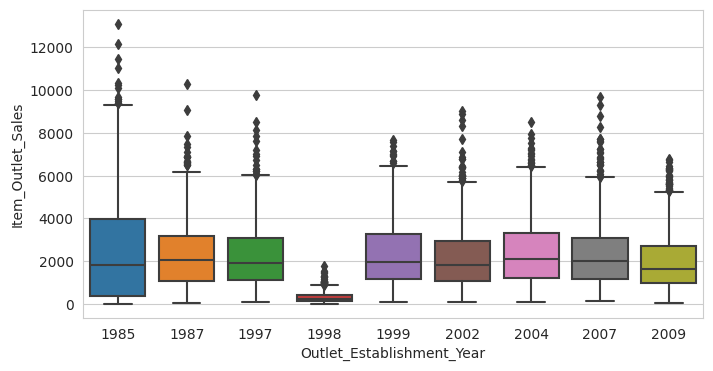

In [353]:
# Boxplot between 'Item_Outlet_Sales' and 'Outlet_Establishment_Year'
plt.figure(figsize=(8, 4))
sns.boxplot(y = combined_df['Item_Outlet_Sales'], x=combined_df['Outlet_Establishment_Year'])
plt.show()

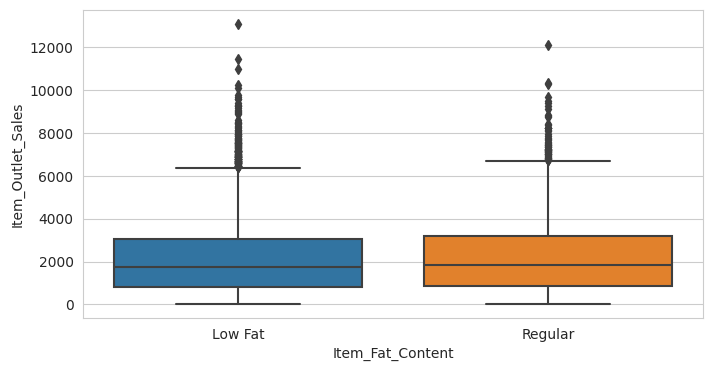

In [354]:
# Boxplot between 'Item_Outlet_Sales' and 'Item_Fat_Content'
plt.figure(figsize=(8, 4))
sns.boxplot(y = combined_df['Item_Outlet_Sales'], x=combined_df['Item_Fat_Content'])
plt.show()

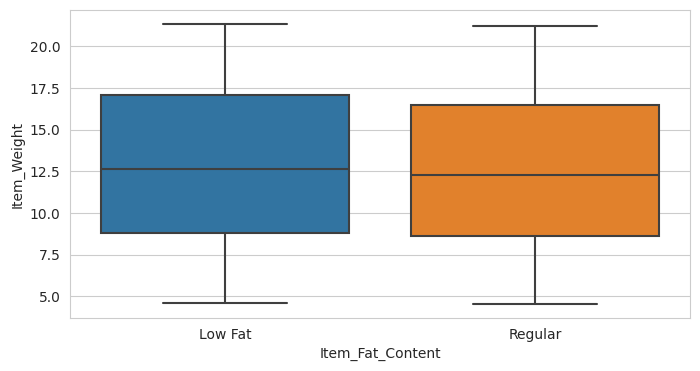

In [355]:
# Boxplot between 'Item_Weight' and 'Item_Fat_Content'
plt.figure(figsize=(8, 4))
sns.boxplot(y = combined_df['Item_Weight'], x=combined_df['Item_Fat_Content'])
plt.show()

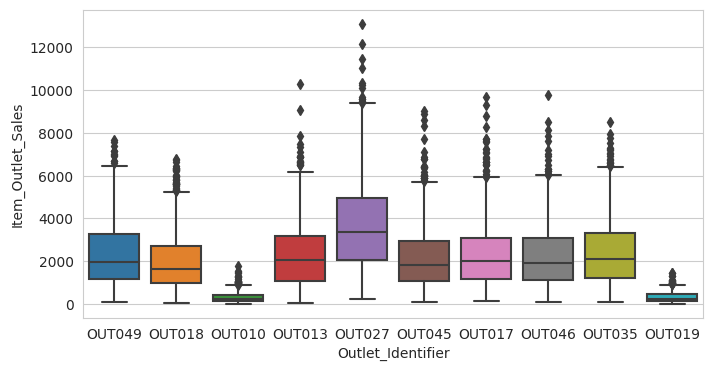

In [356]:
# Boxplot between 'Outlet_Identifier' and 'Item_Outlet_Sales'
plt.figure(figsize=(8, 4))
sns.boxplot(x = combined_df['Outlet_Identifier'], y=combined_df['Item_Outlet_Sales'])
plt.show()

## Numerical - Numerical Features

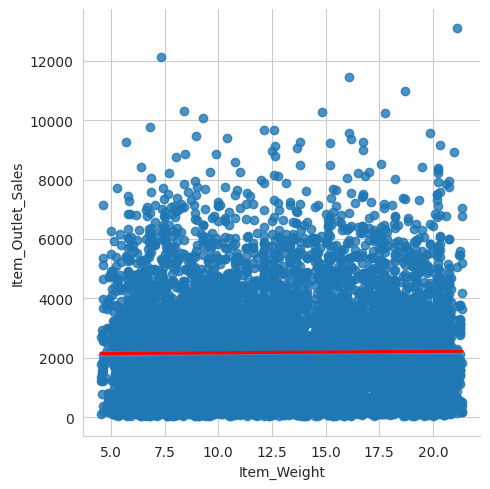

In [357]:
sns.lmplot(data=combined_df, y='Item_Outlet_Sales', x='Item_Weight', fit_reg=True, line_kws={'color': 'red'})
plt.show()

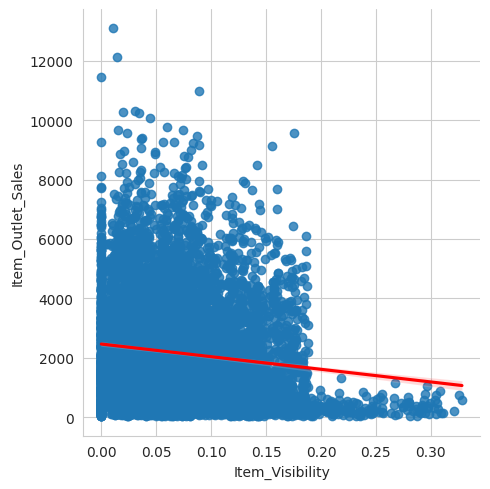

In [358]:
sns.lmplot(data=combined_df, y='Item_Outlet_Sales', x='Item_Visibility', fit_reg=True, line_kws={'color': 'red'})
plt.show()

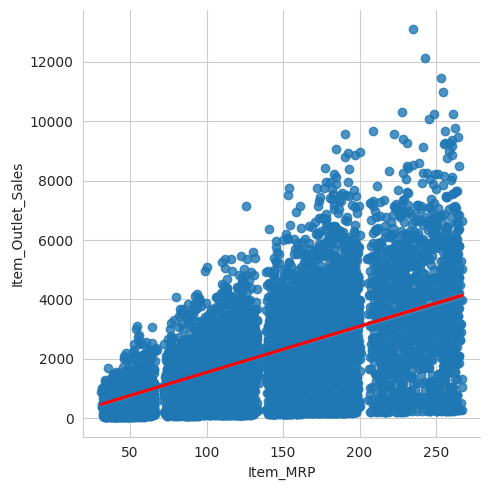

In [359]:
sns.lmplot(data=combined_df, y='Item_Outlet_Sales', x='Item_MRP', fit_reg=True, line_kws={'color': 'red'})
plt.show()

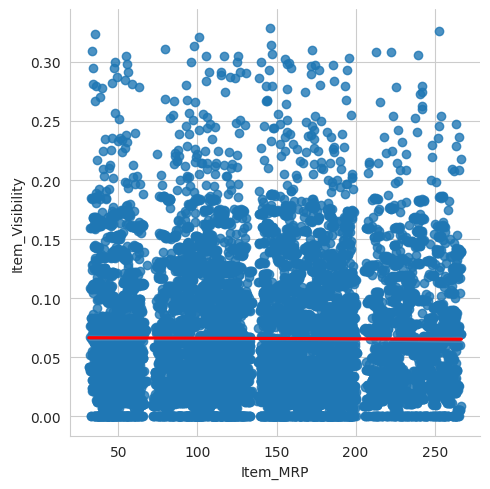

In [360]:
sns.lmplot(data=combined_df, x='Item_MRP', y='Item_Visibility', fit_reg=True, line_kws={'color': 'red'})
plt.show()

# Multivariate Analysis

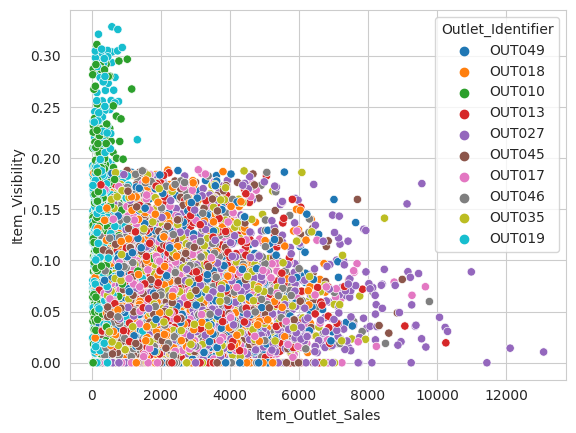

In [361]:
# Scatter plot between 'Item_Outlet_Sales', 'Item_Visibility' and 'Outlet_Identifier'
sns.scatterplot(x=combined_df['Item_Outlet_Sales'], y=combined_df['Item_Visibility'], hue=combined_df['Outlet_Identifier'])
plt.show()

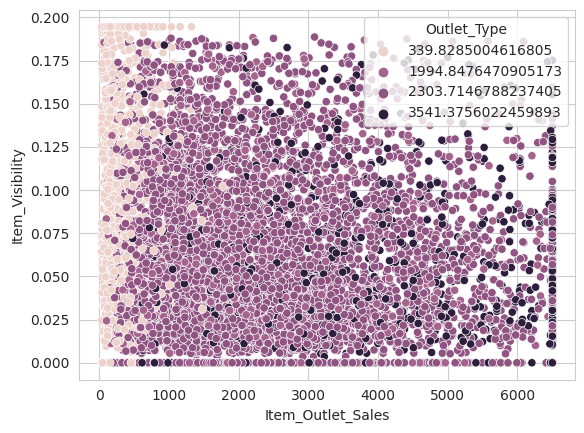

In [401]:
# Scatter plot between 'Item_Outlet_Sales', 'Item_Visibility' and 'Outlet_Type'
sns.scatterplot(x=combined_df['Item_Outlet_Sales'], y=combined_df['Item_Visibility'], hue=combined_df['Outlet_Type'])
plt.show()

<ipython-input-363-c88d3b8b993c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combined_df.corr(),annot=True,cmap='BrBG_r')


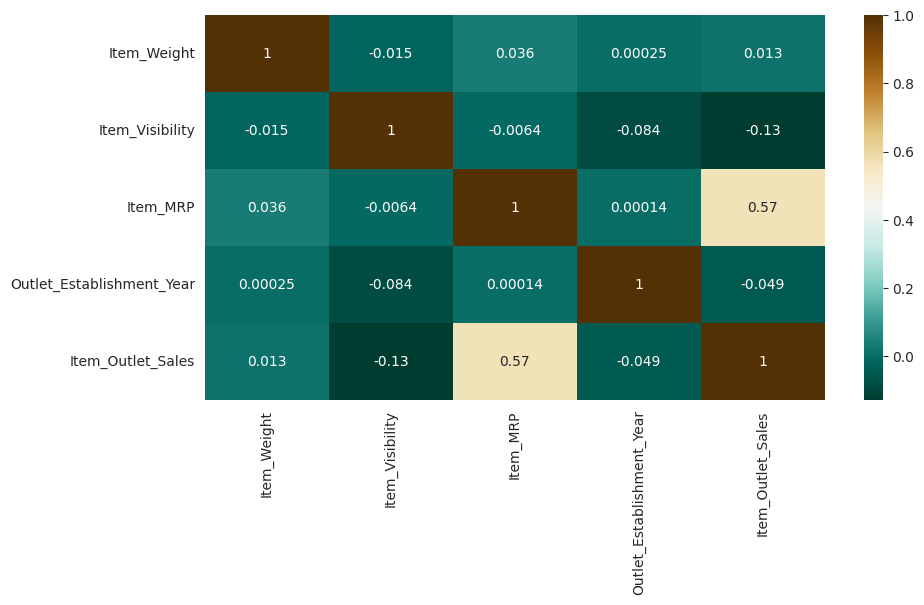

In [363]:
# Correlation plot
plt.figure(figsize=(10, 5))

sns.heatmap(combined_df.corr(),annot=True,cmap='BrBG_r')
plt.show()

> Upon conducting a comprehensive analysis, certain unnecessary columns can be omitted.

In [364]:
df.shape

(8523, 12)

# Outlier Detection and treatment

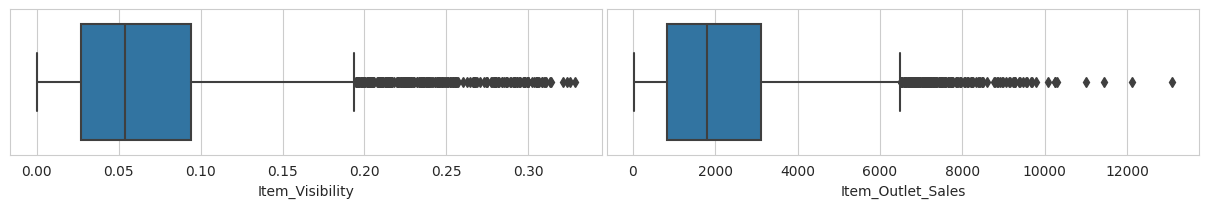

In [365]:
plt.figure(figsize= (12, 2))

plt.subplot(1, 2, 1)
sns.boxplot(x=combined_df["Item_Visibility"])

plt.subplot(1, 2, 2)
sns.boxplot(x=combined_df["Item_Outlet_Sales"])

plt.tight_layout(pad=0.4)
plt.show()

In [366]:
# Define a function called 'outliers' which returns a list of index of outliers
def cap_outliers(df):
  for ft in df.columns:
    if((df[ft].dtypes) == 'float64'):
      q1 = df[ft].quantile(0.25)
      q3 = df[ft].quantile(0.75)
      iqr = q3 - q1

      lower_bound = q1 - (1.5 * iqr)
      upper_bound = q3 + (1.5 * iqr)

      df[ft] = np.where(df[ft] > upper_bound, upper_bound, np.where(df[ft] < lower_bound, lower_bound, df[ft]))

    else:
      df[ft] = df[ft]

  return df

In [367]:
combined_df = cap_outliers(combined_df)
combined_df.shape

(14204, 12)

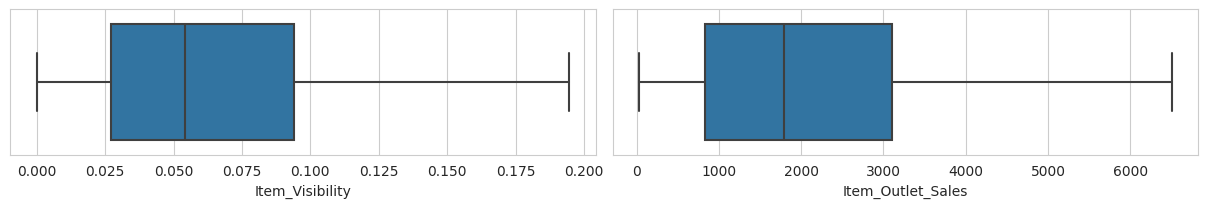

In [368]:
plt.figure(figsize= (12, 2))

plt.subplot(1, 2, 1)
sns.boxplot(x=combined_df["Item_Visibility"])

plt.subplot(1, 2, 2)
sns.boxplot(x=combined_df["Item_Outlet_Sales"])

plt.tight_layout(pad=0.4)
plt.show()

# Encoding categorical features

In [369]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [370]:
from category_encoders import TargetEncoder

target_enc = ['Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Identifier', 'Item_Fat_Content', 'Item_Type', ]

for col in target_enc:
  TEncoder = TargetEncoder()
  combined_df[col] = TEncoder.fit_transform(combined_df[col], combined_df["Item_Outlet_Sales"])

combined_df.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2860,2286.085732,15.0,2199.620803,0.026841,1945.506130,219.8456,2265.838389,1997,1856.496987,1869.637079,2303.714679,4863.0032
9097,2028.666252,11.8,2199.620803,0.025801,2137.242282,101.6674,3541.375602,1985,2628.060993,2233.239974,3541.375602,NaN


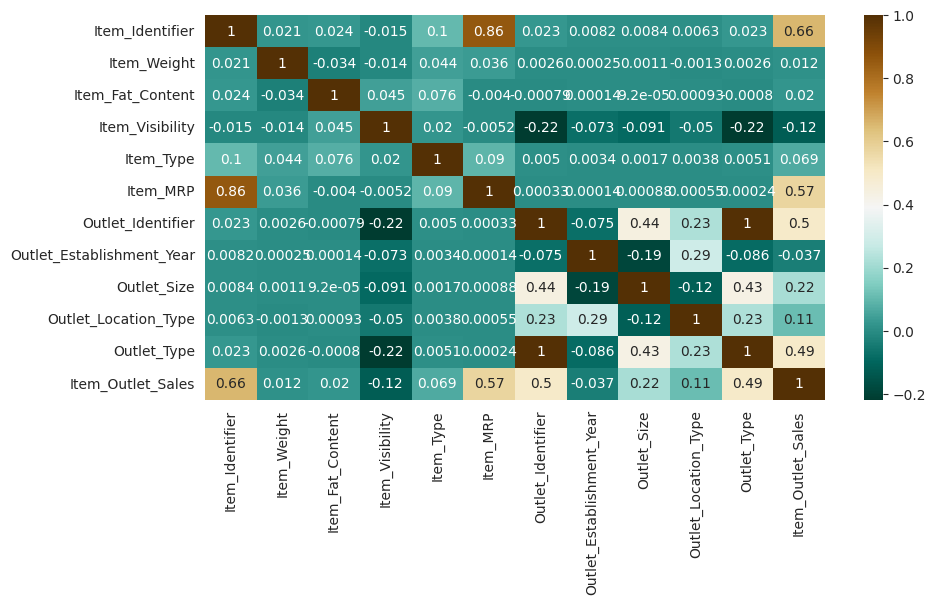

In [371]:
plt.figure(figsize=(10, 5))
sns.heatmap(combined_df.corr(),annot=True,cmap='BrBG_r')
plt.show()

In [372]:
# Splitting the 'combined_df' DataFrame to 'df' and 'df_test'
df_test = combined_df[combined_df['Item_Outlet_Sales'].isnull()].copy(deep=True)
df = combined_df[combined_df['Item_Outlet_Sales'].isnull() == False].copy(deep=True)
df_test.drop(columns=['Item_Outlet_Sales'], axis=1, inplace=True)
df.shape, df_test.shape

((8523, 12), (5681, 11))

# Checking VIF

In [373]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = df
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Outlet_Establishment_Year,4941.92
2,Item_Fat_Content,4354.52
6,Outlet_Identifier,1450.64
10,Outlet_Type,1441.28
0,Item_Identifier,540.10
4,Item_Type,381.71
9,Outlet_Location_Type,164.43
8,Outlet_Size,50.27
5,Item_MRP,27.07
1,Item_Weight,8.72


# Splitting the dataset into train and test sets

In [374]:
X = df.drop(columns=['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [375]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape

((6392, 11), (2131, 11), (6392,))

# Standardization

In [376]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)

X_test_scaled = scale.transform(X_test)

X_train_scaled

array([[ 0.88453659,  0.73664768, -0.7403206 , ...,  1.32985215,
         0.41331931, -0.21064161],
       [ 1.76110446,  0.49932741,  1.35076614, ...,  1.32985215,
         0.41331931, -0.21064161],
       [ 0.19708582, -0.1263351 ,  1.35076614, ...,  1.32985215,
        -1.59915999,  0.17352248],
       ...,
       [ 2.50527808,  1.00632979, -0.7403206 , ..., -0.84672605,
         0.83590438,  0.17352248],
       [-0.95031571,  1.59963045, -0.7403206 , ..., -0.84672605,
         0.83590438,  0.17352248],
       [-1.09498056,  0.73664768, -0.7403206 , ..., -0.84672605,
        -1.59915999,  0.17352248]])

In [377]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = X_train_scaled
vif['Features'] = df.drop(columns=['Item_Outlet_Sales'], axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_t, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Outlet_Identifier,180.50
10,Outlet_Type,179.55
0,Item_Identifier,4.36
5,Item_MRP,4.33
8,Outlet_Size,1.35
9,Outlet_Location_Type,1.22
7,Outlet_Establishment_Year,1.18
3,Item_Visibility,1.07
2,Item_Fat_Content,1.02
4,Item_Type,1.02


- We can observe a high correlation between 'Outlet_Type' and 'Outlet_Identifier'
> Proceeding to drop the 'Outlet_Type' column

In [378]:
X = df.drop(columns=['Item_Outlet_Sales', 'Outlet_Type'], axis=1)
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape

((6392, 10), (2131, 10), (6392,))

In [379]:
X.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type
7209,2121.833283,16.600,2132.716277,0.050393,2208.116980,118.4124,2180.051014,2002,1856.496987,2309.590154
1943,2102.575251,4.635,2132.716277,0.141175,2185.099896,127.0994,2180.051014,2002,1856.496987,2309.590154


In [380]:
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

X_train

array([[ 0.88453659,  0.73664768, -0.7403206 , ...,  1.32784893,
         1.32985215,  0.41331931],
       [ 1.76110446,  0.49932741,  1.35076614, ...,  1.32784893,
         1.32985215,  0.41331931],
       [ 0.19708582, -0.1263351 ,  1.35076614, ...,  0.13618724,
         1.32985215, -1.59915999],
       ...,
       [ 2.50527808,  1.00632979, -0.7403206 , ...,  0.49368575,
        -0.84672605,  0.83590438],
       [-0.95031571,  1.59963045, -0.7403206 , ...,  1.0895166 ,
        -0.84672605,  0.83590438],
       [-1.09498056,  0.73664768, -0.7403206 , ..., -0.10214509,
        -0.84672605, -1.59915999]])

In [381]:
vif = pd.DataFrame()
X_t = X_train
vif['Features'] = df.drop(columns=['Item_Outlet_Sales', 'Outlet_Type'], axis=1).columns
vif['VIF'] = [variance_inflation_factor(X_t, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Item_Identifier,4.36
5,Item_MRP,4.33
6,Outlet_Identifier,1.47
8,Outlet_Size,1.33
9,Outlet_Location_Type,1.22
7,Outlet_Establishment_Year,1.14
3,Item_Visibility,1.07
2,Item_Fat_Content,1.02
4,Item_Type,1.02
1,Item_Weight,1.01


In [382]:
# We will drop the 'Outlet_Type' column for the test set as well
df_test.drop(columns=['Outlet_Type'], axis=1, inplace=True)

In [383]:
df.shape

(8523, 12)

# Linear Regression

In [384]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [385]:
y_pred = lr.predict(X_test)

In [386]:
from sklearn.metrics import r2_score, mean_squared_error

print('RMSE Score: ', mean_squared_error(y_pred, y_test))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE Score:  915192.8834242158
R2 Score:  0.4588679684845731


In [387]:
r2 = r2_score(y_test, y_pred)

# Calculate the number of predictors (features)
p = X_train.shape[1]

# Calculate the adjusted R-squared score
n = len(y)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.6347432913676093


# Lasso() and Ridge() Regression

In [388]:
from sklearn.linear_model import Lasso, Ridge

# Lasso regression
lasso = Lasso(alpha=0.1)  # You can adjust the alpha (regularization parameter)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)


print('RMSE Score: ', mean_squared_error(lasso_predictions, y_test))
print('R2 Score: ', r2_score(lasso_predictions, y_test))

RMSE Score:  915178.2448155277
R2 Score:  0.4587644780415103


In [389]:
r2 = r2_score(y_test, lasso_predictions)

# Calculate the number of predictors (features)
p = X_train.shape[1]

# Calculate the adjusted R-squared score
n = len(y)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.6347491336879826


In [390]:
# Ridge regression
ridge = Ridge(alpha=0.5)  # You can adjust the alpha (regularization parameter)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)

print('RMSE Score: ', mean_squared_error(ridge_predictions, y_test))
print('R2 Score: ', r2_score(ridge_predictions, y_test))

RMSE Score:  915188.2682597873
R2 Score:  0.4588071974964185


In [391]:
r2 = r2_score(y_test, ridge_predictions)

# Calculate the number of predictors (features)
p = X_train.shape[1]

# Calculate the adjusted R-squared score
n = len(y)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.6347451332960152


# Random Forest

In [392]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [393]:
y_pred = rf.predict(X_test)

In [394]:
print('RMSE Score: ', mean_squared_error(y_pred, y_test))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE Score:  998174.0022136569
R2 Score:  0.46114659442830164


In [395]:
r2 = r2_score(y_test, y_pred)

# Calculate the number of predictors (features)
p = X_train.shape[1]

# Calculate the adjusted R-squared score
n = len(y)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.6016252340961614


# XG Boost

In [396]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [397]:
print('RMSE Score: ', mean_squared_error(y_pred, y_test))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE Score:  1033685.3095131037
R2 Score:  0.462934486732405


In [398]:
r2 = r2_score(y_test, y_pred)

# Calculate the number of predictors (features)
p = X_train.shape[1]

# Calculate the adjusted R-squared score
n = len(y)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.587452546066837


- Since Linear Regression is giving us the highest adjusted r2 score we will proceed with the same.

# Now prediction Time

In [399]:
df_test.sample(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type
13577,2043.080254,21.25,2132.716277,0.017507,2137.242282,184.0608,340.329723,1985,1856.496987,1869.637079
13579,2380.857981,20.25,2199.620803,0.022604,2181.264770,248.1092,1994.847647,2009,2628.060993,2233.239974


In [400]:
# Prediciton with Linear Regression
y_pred = lr.predict(df_test.values)
y_pred

array([3526005.80647336, 3468592.06613899, 2491622.61686046, ...,
       3445435.67525618, 3682426.13046941, 3445448.33641787])

In [ ]:
# Prediction with Random Forest
y_pred = rf.predict(df_test.values)
y_pred

In [ ]:
# Prediciton with XGBoost
y_pred = xgb_model.predict(df_test.values)
y_pred

# Conclusions

- Linear regression, Ridge and Lasso are having the best performances among all the models we applied with 0.6347 r2-score.
- XGBoost and Random Forest could be further tuned for better performance.